In [3]:
import os

import pandas as pd

from utils.plotting import plot_histogram_kde

import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

In [4]:
DATA_PATH = "../data"

In [5]:
os.listdir(DATA_PATH)

datasets = {}

for car in os.listdir(DATA_PATH):
    datasets[car] = {}

    for obd_type in os.listdir(DATA_PATH + "/" + car):
        datasets[car][obd_type] = {}

        for csv_file in os.listdir(DATA_PATH + "/" + car + "/" + obd_type):
            if "debug" in csv_file:
                datasets[car][obd_type]["debug"] = pd.read_csv(DATA_PATH + "/" + car + "/" + obd_type + "/" + csv_file)
            else:
                datasets[car][obd_type]["data"] = pd.read_csv(DATA_PATH + "/" + car + "/" + obd_type + "/" + csv_file)

# Data Analysis

In [6]:
algorithmns_columns = [col for col in datasets["polo"]["A"]["data"].columns if "(microseconds)" in col]

algorithmns_columns

['FuelModelPredictionTime(microseconds)',
 'TedaModelPredictionTime(microseconds)',
 'DriveBehaviourModelPredictionTime(microseconds)',
 'CityRoadModelPredictionTime(microseconds)']

In [7]:
algorithmns_data = pd.concat(
    [
        datasets[car][obd_type]["data"][algorithmns_columns]
        for car in datasets.keys()
        for obd_type in datasets[car].keys() if "data" in datasets[car][obd_type].keys()
    ],
    axis=0,
    ignore_index=True
)

In [8]:
algorithmns_data.describe()

,FuelModelPredictionTime(microseconds),TedaModelPredictionTime(microseconds),DriveBehaviourModelPredictionTime(microseconds),CityRoadModelPredictionTime(microseconds)
count,3659.000000,3659.000000,3659.000000,3659.000000
mean,213.809237,1.887674,316.205521,168.298169
std,643.482800,8.256297,197.010611,80.802806
min,0.000000,0.000000,0.000000,20.000000
25%,131.000000,1.000000,209.000000,110.000000
50%,186.000000,2.000000,296.000000,157.000000
75%,227.500000,2.000000,359.000000,208.000000
max,24878.000000,457.000000,3680.000000,1051.000000


## FuelModelPredictionTime

In [9]:
(algorithmns_data["FuelModelPredictionTime(microseconds)"] > 2000).sum()

np.int64(5)

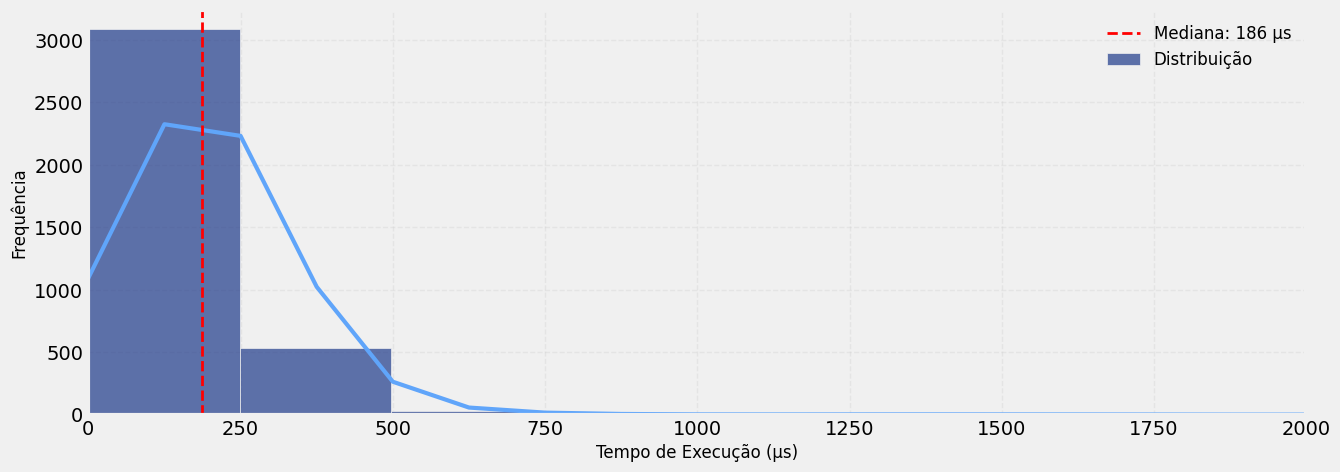

In [10]:
plot_histogram_kde(
    data=algorithmns_data,
    variable="FuelModelPredictionTime(microseconds)",
    bins=100,
    hist_color="#1E3A8A",
    kde_color="#60A5FA",
    show_median=True,
    median_color="red",
    xlabel="Tempo de Execução (µs)",
    ylabel="Frequência",
    xlim=(0, 2000)
)

## TedaModelPredictionTime

In [11]:
(algorithmns_data["TedaModelPredictionTime(microseconds)"] > 50).sum()

np.int64(4)

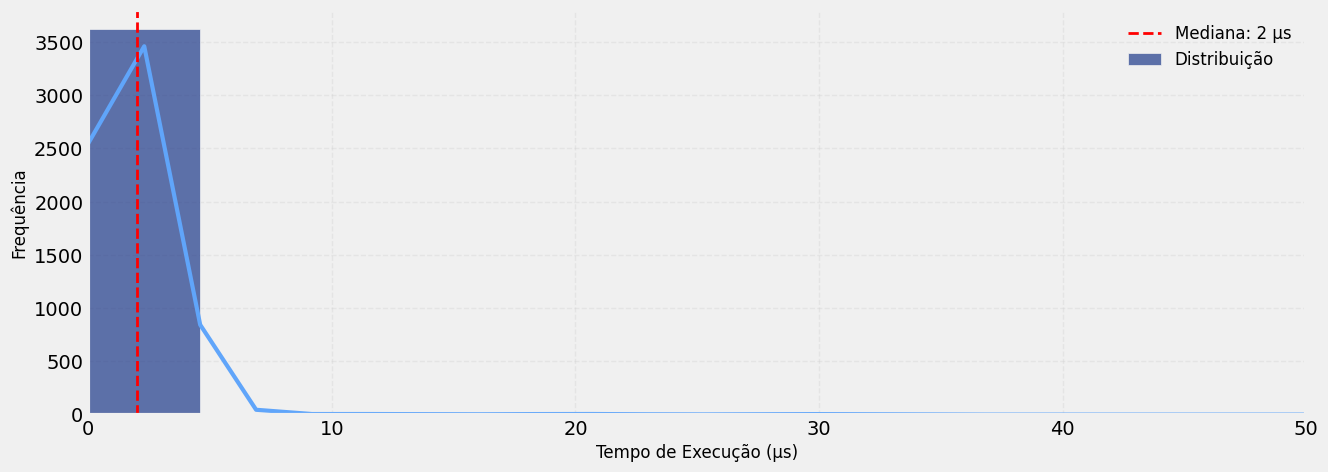

In [12]:
plot_histogram_kde(
    data=algorithmns_data,
    variable="TedaModelPredictionTime(microseconds)",
    bins=100,
    hist_color="#1E3A8A",
    kde_color="#60A5FA",
    show_median=True,
    median_color="red",
    xlabel="Tempo de Execução (µs)",
    ylabel="Frequência",
    xlim=(0, 50)
)

## DriveBehaviourModelPredictionTime

In [13]:
(algorithmns_data["DriveBehaviourModelPredictionTime(microseconds)"] > 2000).sum()

np.int64(7)

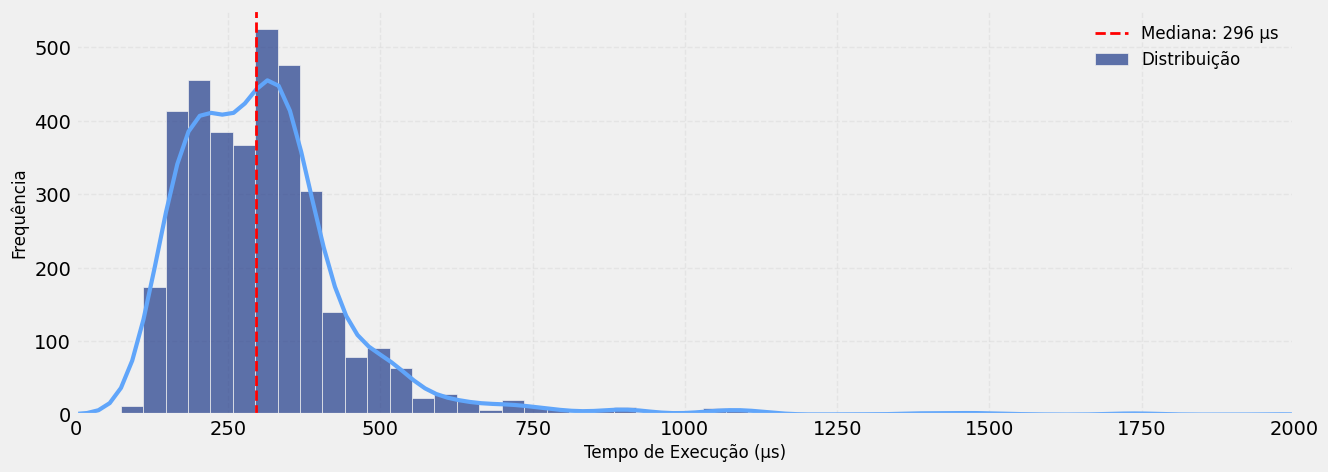

In [14]:
plot_histogram_kde(
    data=algorithmns_data,
    variable="DriveBehaviourModelPredictionTime(microseconds)",
    bins=100,
    hist_color="#1E3A8A",
    kde_color="#60A5FA",
    show_median=True,
    median_color="red",
    xlabel="Tempo de Execução (µs)",
    ylabel="Frequência",
    xlim=(0, 2000)
)

## CityRoadModelPredictionTime

In [15]:
(algorithmns_data["CityRoadModelPredictionTime(microseconds)"] > 600).sum()

np.int64(10)

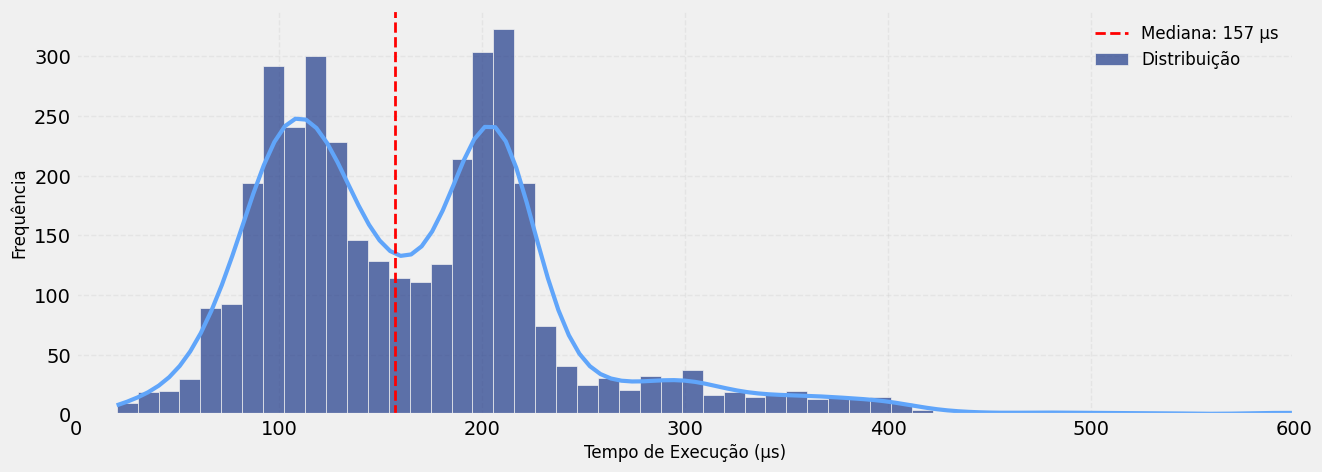

In [16]:
plot_histogram_kde(
    data=algorithmns_data,
    variable="CityRoadModelPredictionTime(microseconds)",
    bins=100,
    hist_color="#1E3A8A",
    kde_color="#60A5FA",
    show_median=True,
    median_color="red",
    xlabel="Tempo de Execução (µs)",
    ylabel="Frequência",
    xlim=(0, 600)
)

# Trip Plotting